# HW5 ECE 289: Random Graphs, Distribution Fitting

## In this homework we are going to get familiar with generative models for generating random graphs and study their properties for different values of their parameters.

## Task 1: Erdos Renyi Random Graphs (ERRGs)

### Remark: It is suggested that you define functions for parts of this task that can be used for other graphs (e.g. plotting the degree distribution, etc.) so that you can re-use them in the next tasks.

### Using NetworkX generate six Erdos Renyi Random Graphs (ERRGs) with n = 1000 nodes and with parameters p = 0.5/n, 1/n, 1.5/n, 0.5ln(n)/n, ln(n)/n, 1.5ln(n)/n.

In [7]:
# Importing networkx library
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy

In [8]:
# Generating an Erdos Renyi graph with parameters n and p
n  = 1000
G1 = nx.erdos_renyi_graph(n, 0.5/n)
G2 = nx.erdos_renyi_graph(n, 1/n)
G3 = nx.erdos_renyi_graph(n, 1.5/n)
G4 = nx.erdos_renyi_graph(n, 0.5*np.log(n)/n)
G5 = nx.erdos_renyi_graph(n, np.log(n)/n)
G6 = nx.erdos_renyi_graph(n, 1.5*np.log(n)/n)

### Use NetworkX to store the graphs in .graphml and then visualize them using Gephi. Include your visualizations in SVG format in your notebook. Make sure that your visulization depicts how well connected each of these graphs are. Explain your observations.

In [7]:
nx.write_gml(G1,"g1.gml")
nx.write_gml(G2,"g2.gml")
nx.write_gml(G3,"g3.gml")
nx.write_gml(G4,"g4.gml")
nx.write_gml(G5,"g5.gml")
nx.write_gml(G6,"g6.gml")


### Use NetworkX to find the size of the largest connected component in each of the above graphs. (Hint: Use connected_component_subgraphs method.)

In [9]:
def get_connected_component(Graph):
    if(nx.is_connected(Graph)):
        print "graph is connected"
        return Graph
    else:
        print "graph is not connected"
        print "number of connected components:", nx.number_connected_components(Graph)
        #get largest component
        #G1cc = sorted(nx.connected_component_subgraphs(G1), key=len, reverse=True)
        return sorted(nx.connected_component_subgraphs(Graph), key=len, reverse=True)[0]
        #G11 = G1cc[0]

G1cc=get_connected_component(G1)
G2cc=get_connected_component(G2)
G3cc=get_connected_component(G3)
G4cc=get_connected_component(G4)
G5cc=get_connected_component(G5)
G6cc=get_connected_component(G6)

graph is not connected
number of connected components: 767
graph is not connected
number of connected components: 1000
graph is not connected
number of connected components: 293
graph is not connected
number of connected components: 47
graph is not connected
number of connected components: 3
graph is connected


<h1> Gephi Visuals

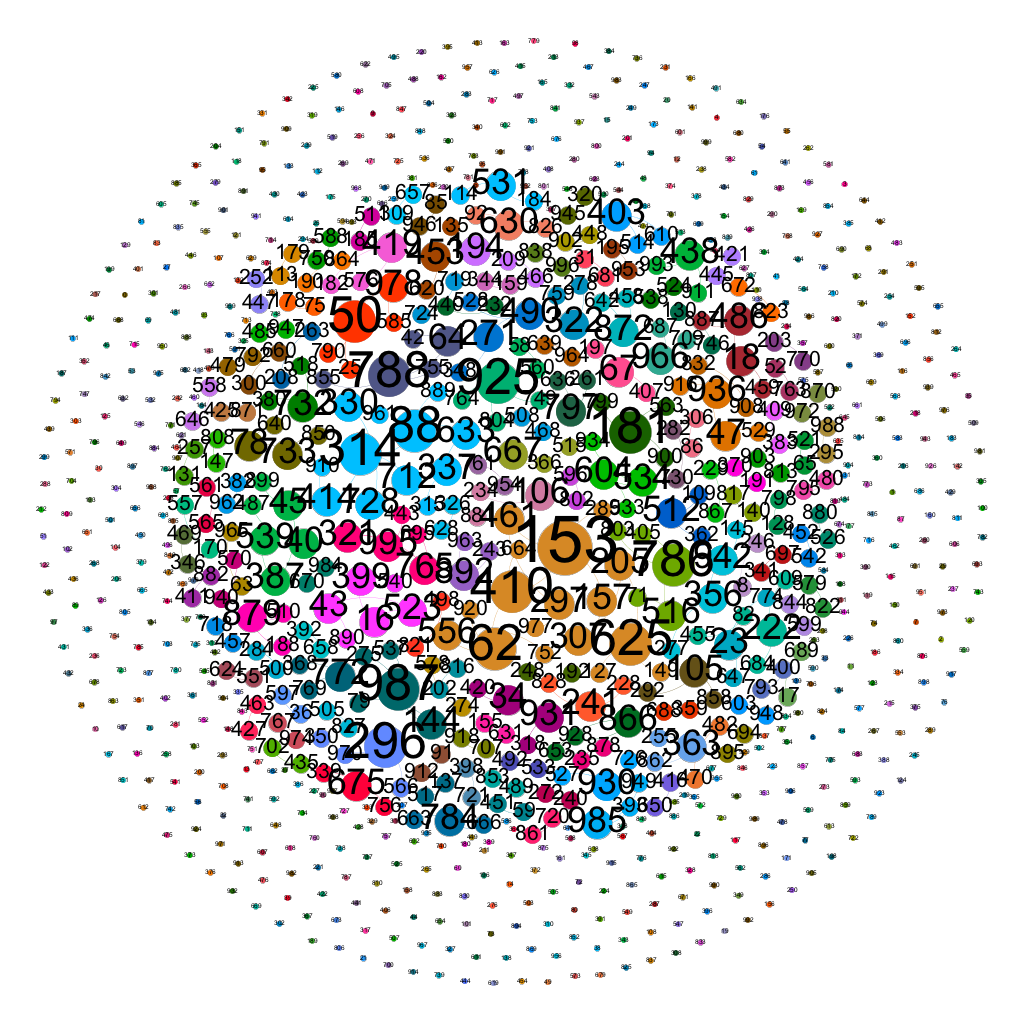

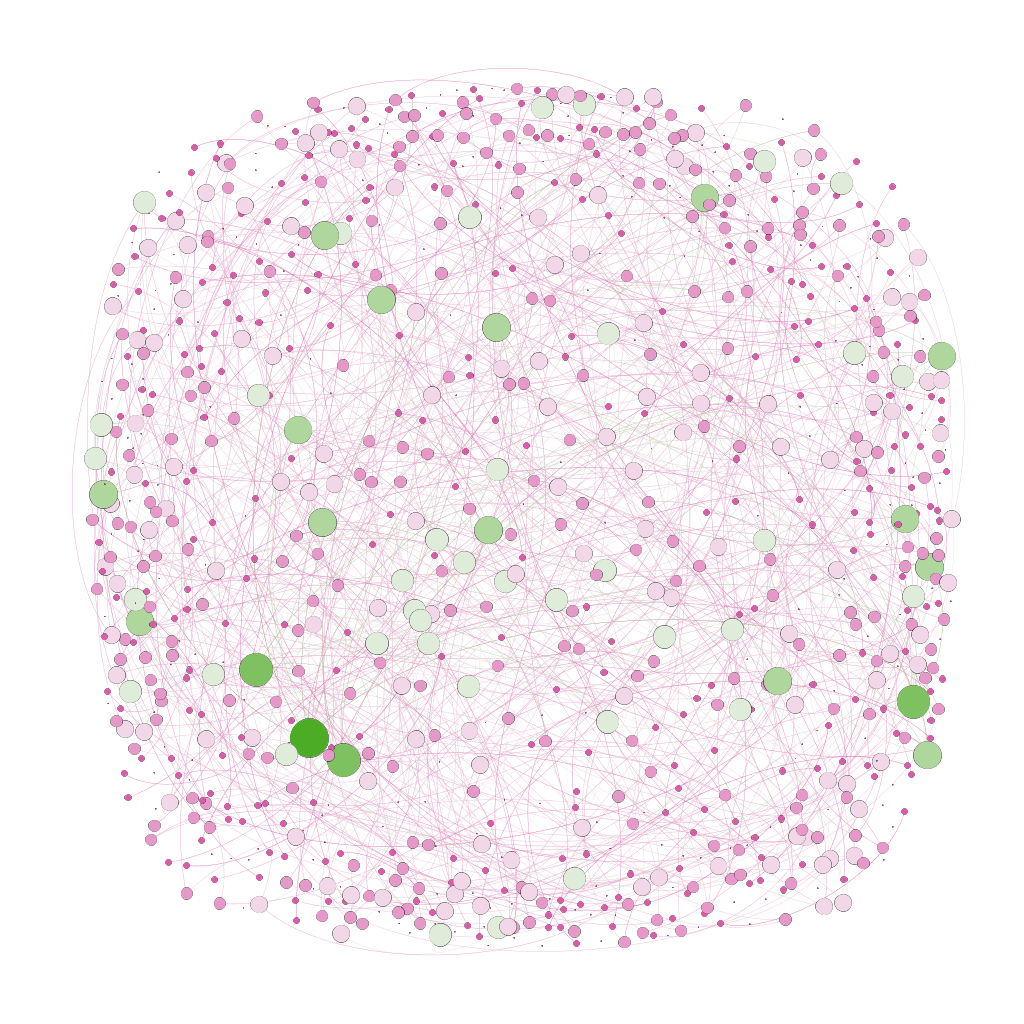

In [6]:
from IPython.display import Image
from IPython.display import display
a=Image(filename='g1.png')
b=Image(filename='g2.png')
display(a,b)

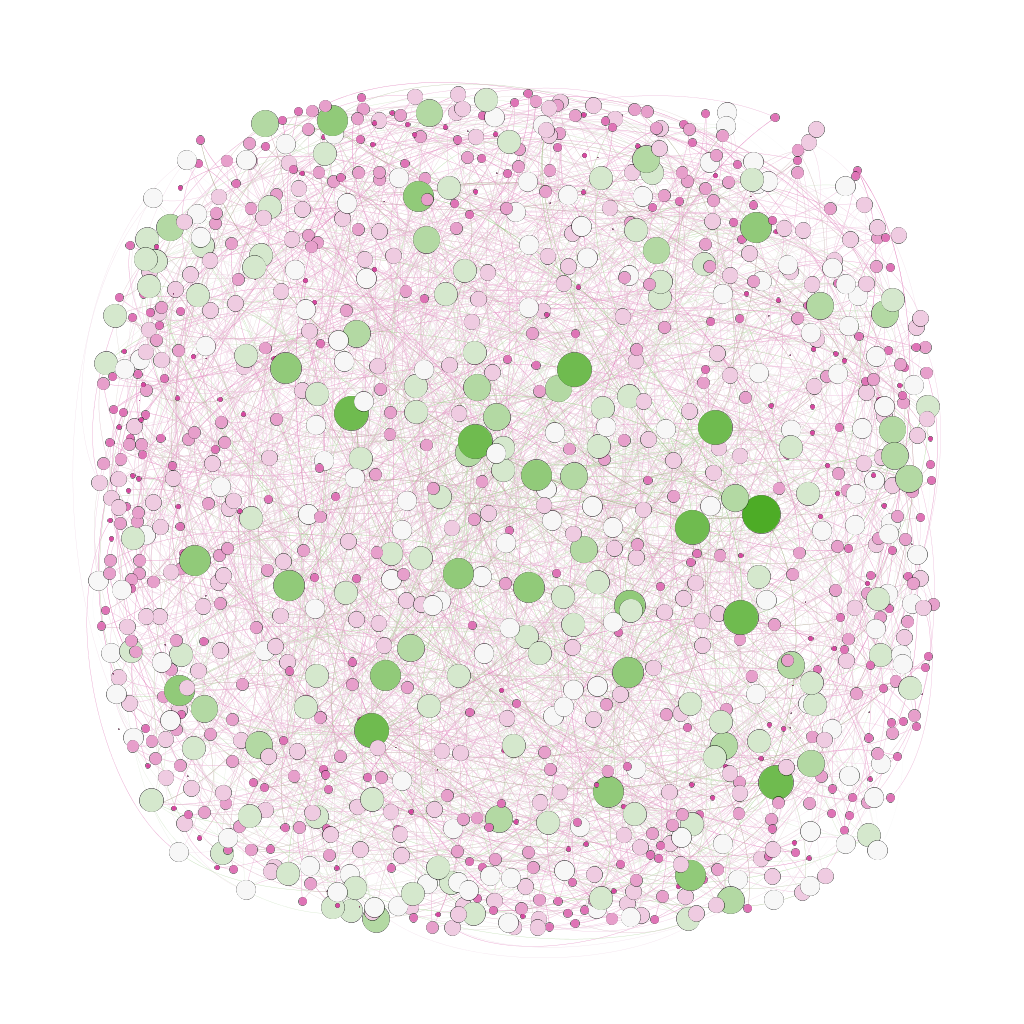

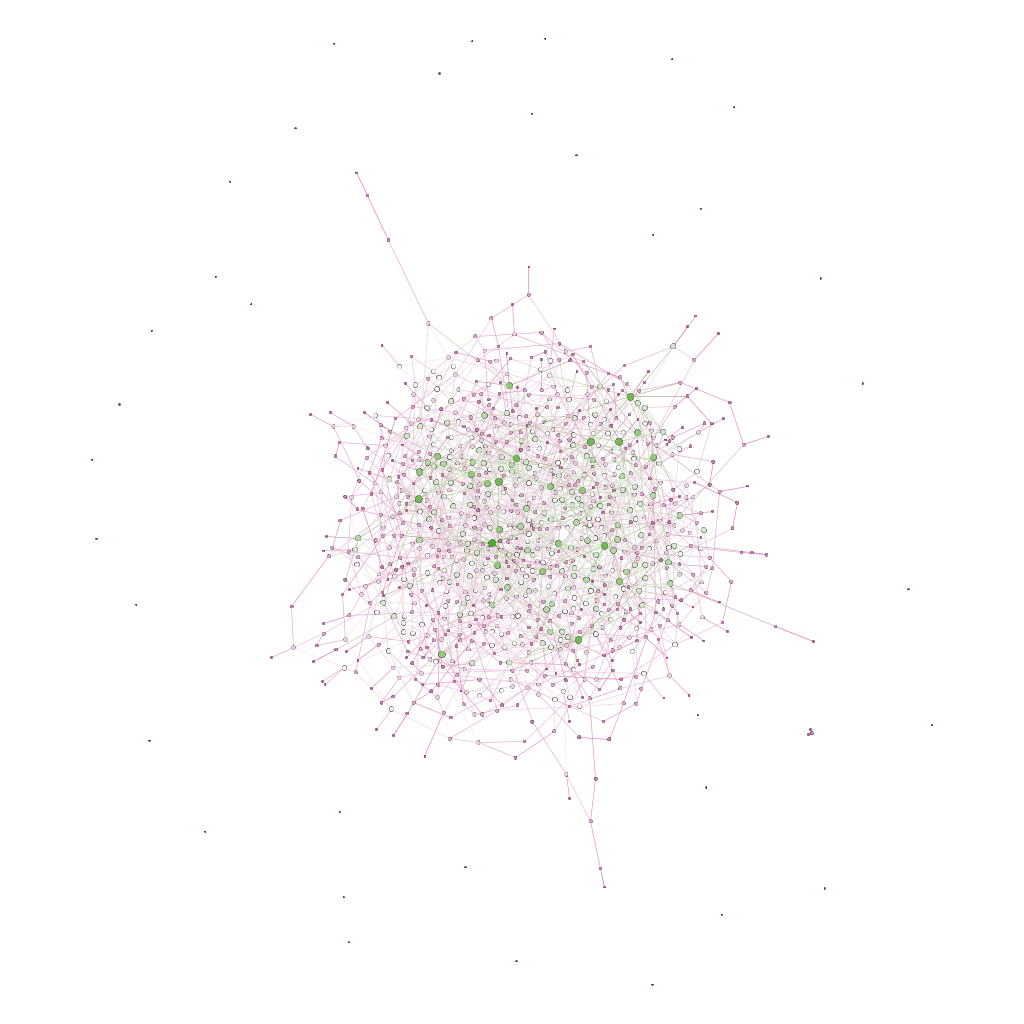

In [4]:
from IPython.display import Image
from IPython.display import display
c=Image(filename='g3.png')
d=Image(filename='g4.png')
display(c,d)

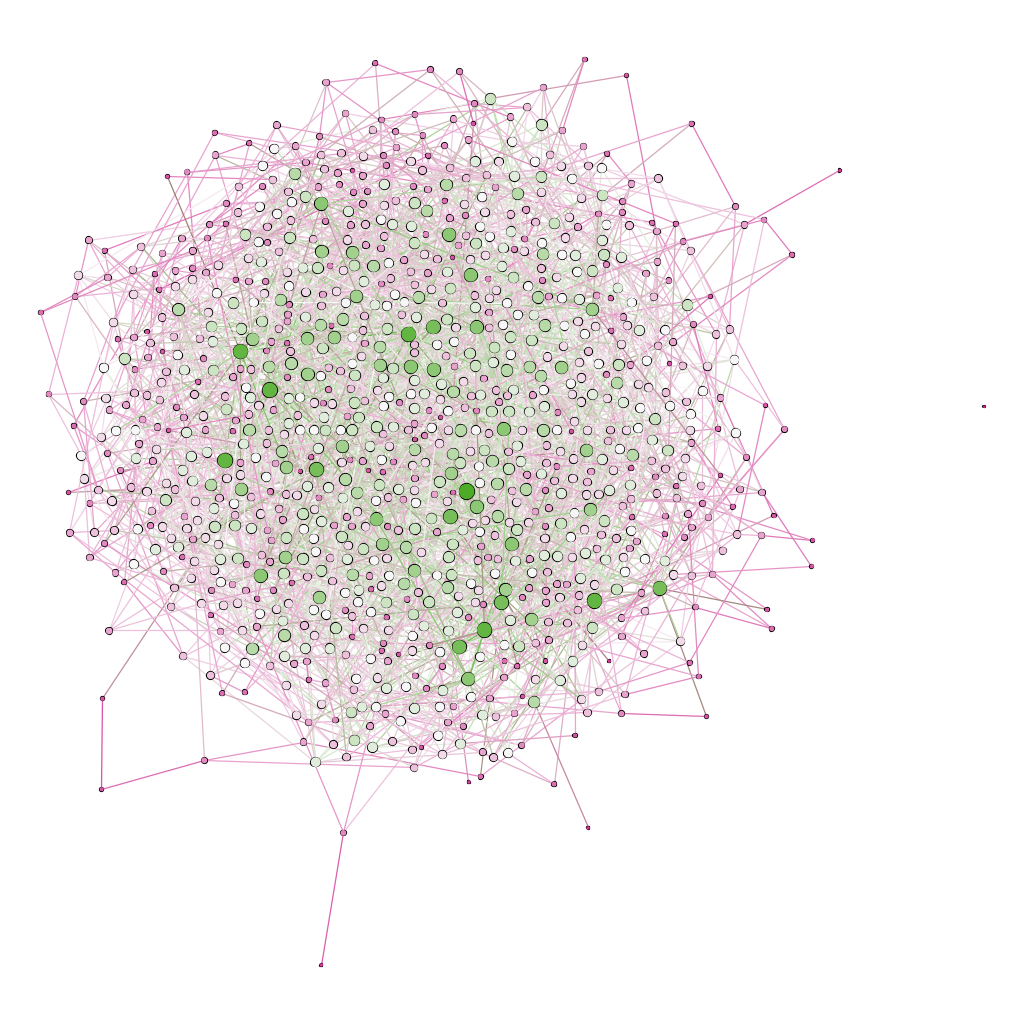

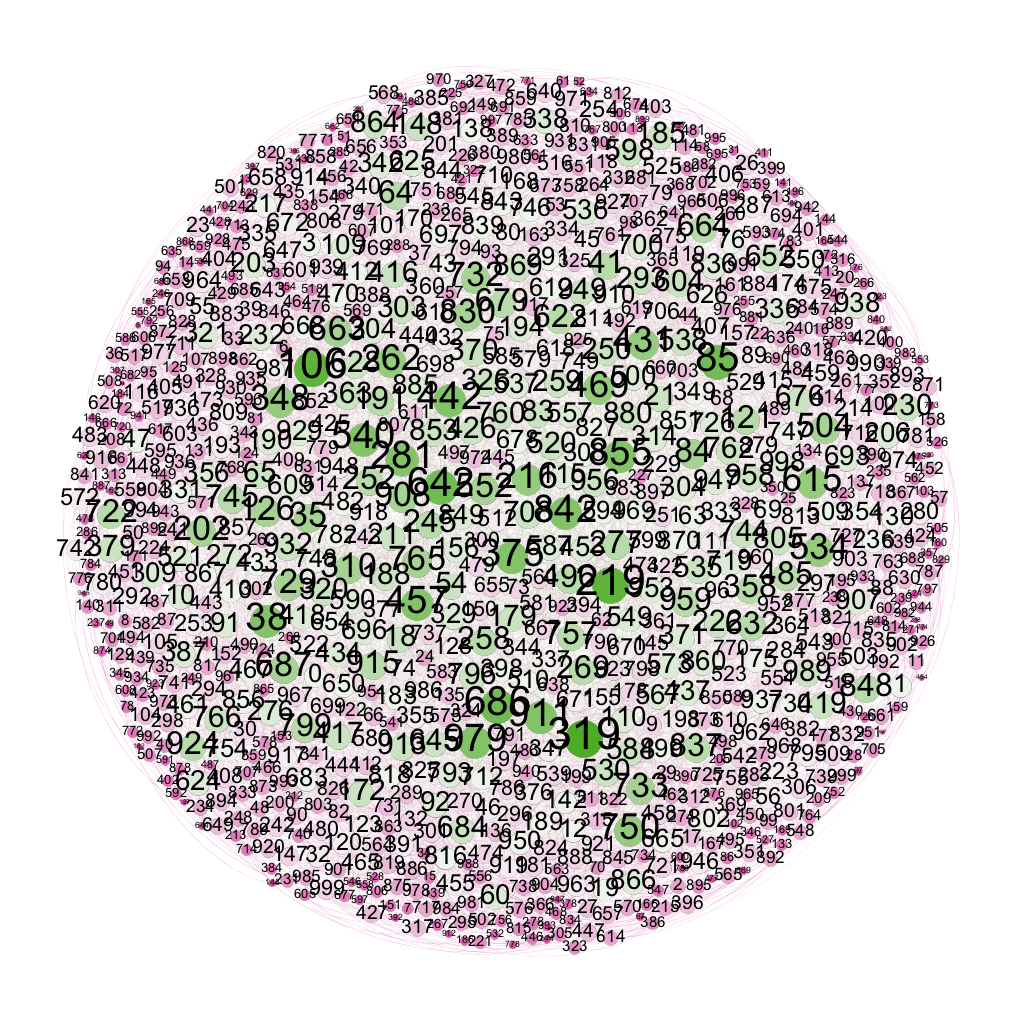

In [5]:
from IPython.display import Image
from IPython.display import display
e=Image(filename='g5.png')
f=Image(filename='g6.png')
display(e,f)

### Repeat the previous part for a few more sets of ERRG. What do you observe? Can you find a relation between the value of the parameter of ERRG and the existence of a giant component? What about the connectivity of the graph?

The ERRG becomes very densely connected as the parameter increases.  However, when the parameter is 1/n the graph has zero edges.

### Plot the degree distribution and the normalized degree distribution for each of these graphs.

G1 deg dist


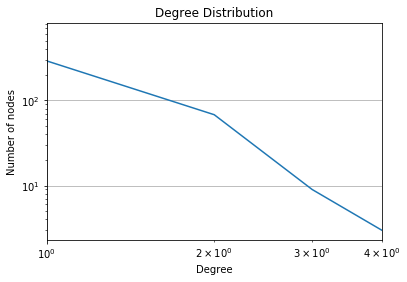

G2 deg dist


/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/ticker.py:2039: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


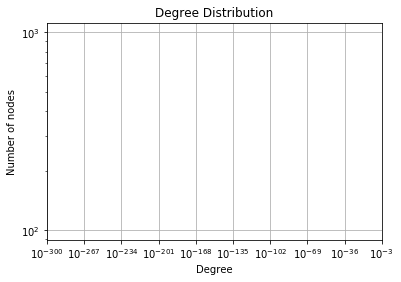

G3 deg dist


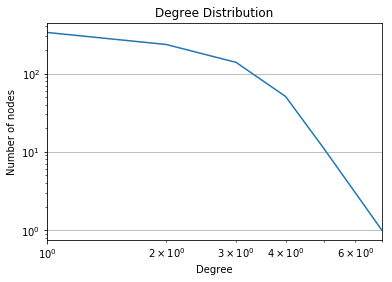

G4 deg dist


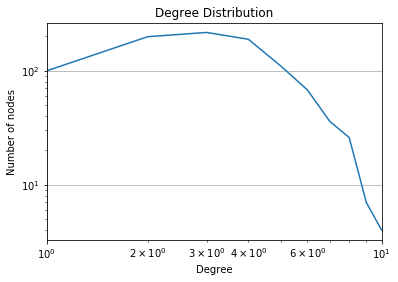

G5 deg dist


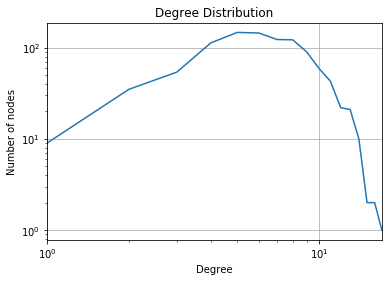

G6 deg dist


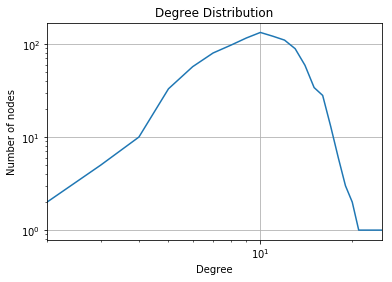

In [13]:
def plot_deg_dist(Graph):
    deg=Graph.degree()
    #print max(deg)
    node=nx.number_of_nodes(Graph)
    
    d=list(np.zeros(node, dtype=np.int))
    temp=list(np.zeros(node, dtype=np.int))
    for k in range (node):
        d[k]= deg[k]
    for k in range (node):
        temp[k]=k
    degList=dict(zip(temp,d))
    for k in Graph.nodes():
        Graph.node[k]['deg'] = deg[k]
    
    deg_values = sorted(set(degList.values()))
    deg_hist = [degList.values().count(x) for x in deg_values]
    plt.figure()
    plt.grid(True)
    plt.loglog(deg_values, deg_hist) #degree
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes')
    plt.title('Degree Distribution')
    plt.xlim([0, max(degList.values())])

    plt.show()
    plt.close()

print "G1 deg dist"
plot_deg_dist(G1)
print "G2 deg dist"
plot_deg_dist(G2)
print "G3 deg dist"
plot_deg_dist(G3)
print "G4 deg dist"
plot_deg_dist(G4)
print "G5 deg dist"
plot_deg_dist(G5)
print "G6 deg dist"
plot_deg_dist(G6)

### Use NetworkX to calculate the diamater and average shortest path length for these graphs. Also plot the clustering coefficient for the nodes of these graphs. 

G1 results:
G1 diameter : 11
G1 avg shortest path length : 4.46405228758


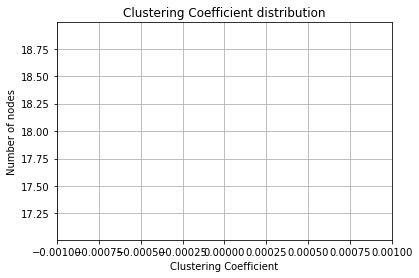

Average Clustering Coefficient= 0.0
G2 results:
G2 diameter : 0
G2 avg shortest path length : 0


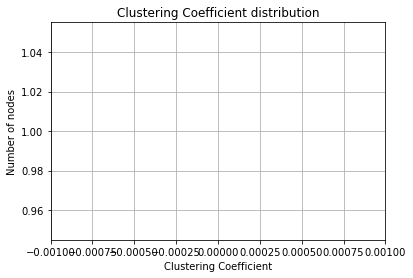

Average Clustering Coefficient= 0.0
G3 results:
G3 diameter : 29
G3 avg shortest path length : 12.5297544814


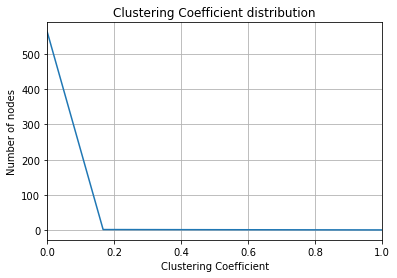

Average Clustering Coefficient= 0.00236406619385
G4 results:
G4 diameter : 13
G4 avg shortest path length : 5.62100045065


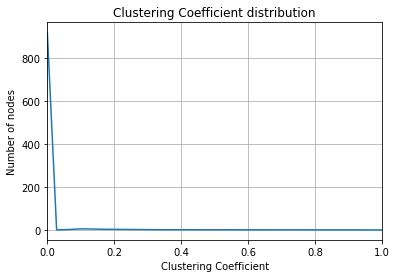

Average Clustering Coefficient= 0.00539215686275
G5 results:
G5 diameter : 7
G5 avg shortest path length : 3.81178002947


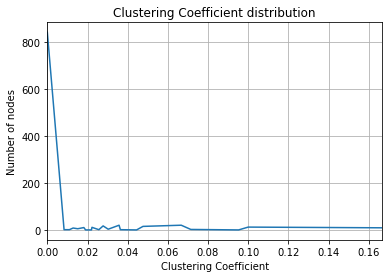

Average Clustering Coefficient= 0.00774588359759
G6 results:
G6 diameter : 5
G6 avg shortest path length : 3.21404004004


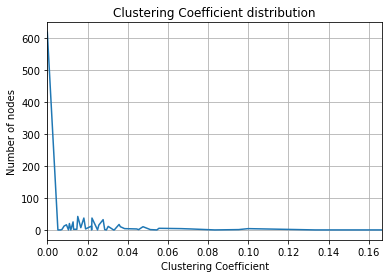

Average Clustering Coefficient= 0.00976981005922


In [14]:
def plot_clustering_coeff(Graph):
    cc=nx.clustering(Graph)
    cc_values = sorted(set(cc.values()))
    cc_hist = [cc.values().count(x) for x in cc_values]
    plt.figure()
    plt.grid(True)
    plt.plot(cc_values, cc_hist)
    plt.xlabel('Clustering Coefficient')
    plt.ylabel('Number of nodes')
    plt.title('Clustering Coefficient distribution')
    plt.xlim([0, max(cc.values())])
    plt.show()
    plt.close()
    print "Average Clustering Coefficient=",np.mean(cc.values())

print "G1 results:"
print "G1 diameter : " + str(nx.diameter(G1cc))
print "G1 avg shortest path length : " + str(nx.average_shortest_path_length(G1cc))
plot_clustering_coeff(G1cc)

print "G2 results:"
print "G2 diameter : " + str(nx.diameter(G2cc))
print "G2 avg shortest path length : " + str(nx.average_shortest_path_length(G2cc))
plot_clustering_coeff(G2cc)

print "G3 results:"
print "G3 diameter : " + str(nx.diameter(G3cc))
print "G3 avg shortest path length : " + str(nx.average_shortest_path_length(G3cc))
plot_clustering_coeff(G3cc)

print "G4 results:"
print "G4 diameter : " + str(nx.diameter(G4cc))
print "G4 avg shortest path length : " + str(nx.average_shortest_path_length(G4cc))
plot_clustering_coeff(G4cc)

print "G5 results:"
print "G5 diameter : " + str(nx.diameter(G5cc))
print "G5 avg shortest path length : " + str(nx.average_shortest_path_length(G5cc))
plot_clustering_coeff(G5cc)

print "G6 results:"
print "G6 diameter : " + str(nx.diameter(G6cc))
print "G6 avg shortest path length : " + str(nx.average_shortest_path_length(G6cc))
plot_clustering_coeff(G6cc)

## Task 2: Preferential Attachment - Barabasi-Albert Random Graphs

### Using NetworkX generate four Barabasi-Albert Random Graphs (BARGs) with n = 1000, 10000 nodes and with parameter m = 2 , 5.  

In [15]:
barg1=nx.barabasi_albert_graph(1000,2)
barg2=nx.barabasi_albert_graph(10000,5)

### Use NetworkX to store the graphs in .gml and then visualize them using Gephi such that each node has a size proportional to its degree (also its color is related to its degree). Include your visualizations in SVG format in your notebook. Do you see an interesting property for these graphs? Explain your answer. Repeat this question for the graphs in Task 1 and compare the results.

In [12]:
nx.write_gml(barg1,"barg1.gml")
nx.write_gml(barg2,"barg2.gml")

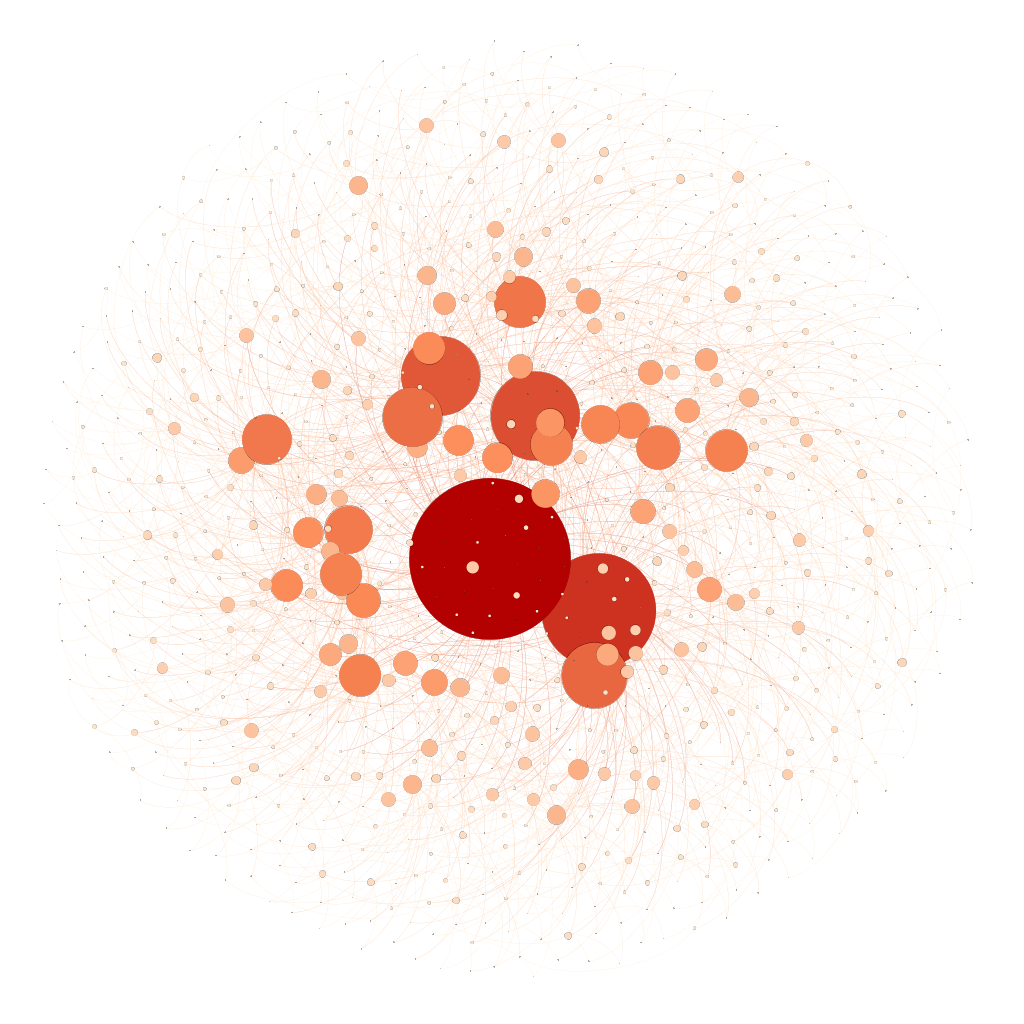

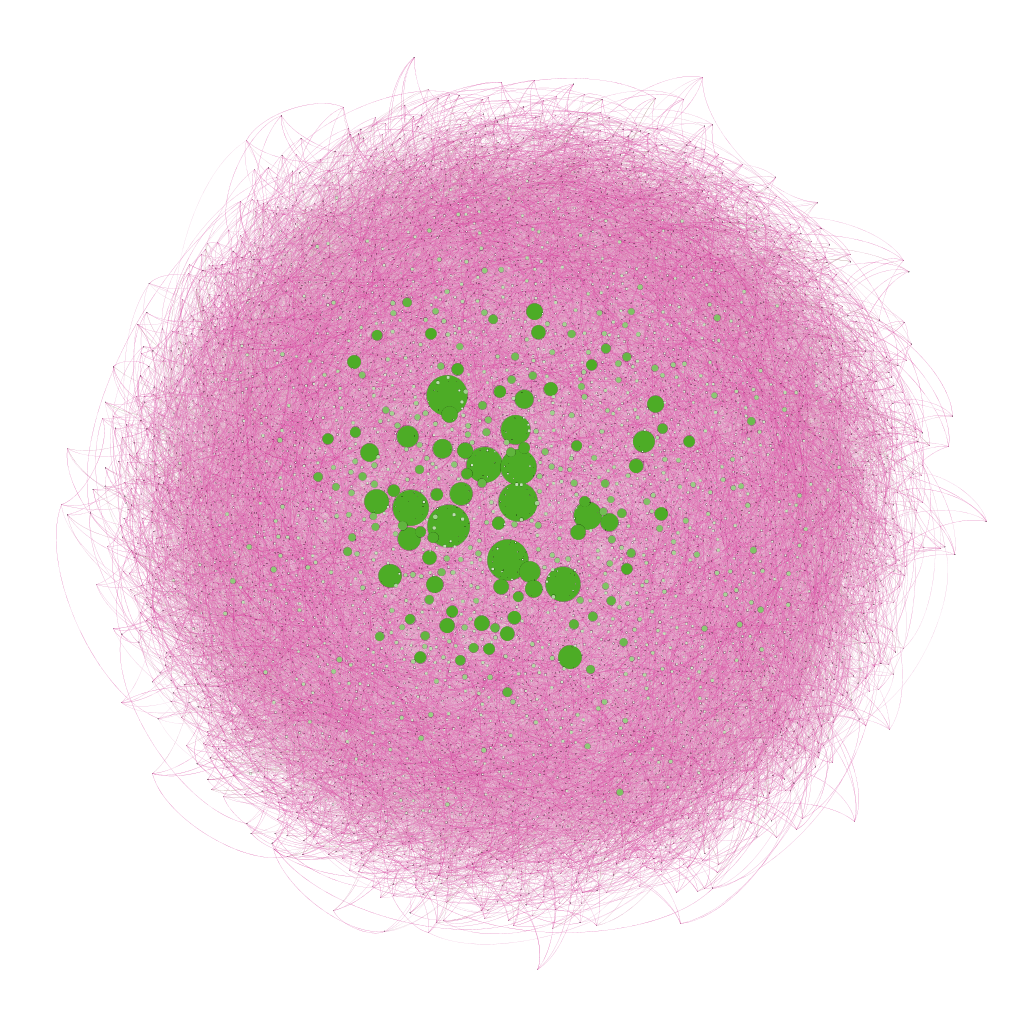

In [10]:
from IPython.display import Image
from IPython.display import display
g=Image(filename='barg1.png')
h=Image(filename='barg2.png')
display(g,h)

The connected component in the second barg is extremely more dense than that of the first barg.  However, they appear to have the same number of largely connected nodes in both bargs.

## Task 3: Small World Model (Watts–Strogatz)

### Using NetworkX generate three Watts-Strogatz Random Graphs (WSRGs) with n = 1000 nodes and with parameters k = 5, and p = 0.2, 0.5, and 0.8.

In [11]:
wsrg1=nx.watts_strogatz_graph(1000,5,0.2)
wsrg2=nx.watts_strogatz_graph(1000,5,0.5)
wsrg3=nx.watts_strogatz_graph(1000,5,0.8)


### Use NetworkX to store the graphs in .gml and then visualize them using Gephi. Include your visualizations in SVG format in your notebook.

In [14]:
nx.write_gml(wsrg1,"wsrg1.gml")
nx.write_gml(wsrg2,"wsrg2.gml")
nx.write_gml(wsrg3,"wsrg3.gml")

### Plot the degree distibution and the noramlized degree distributions of these graphs in arithmetic and log-log scale figures. Based on these plots, can you make a guess about the distribution of these graphs? Explain your answer.

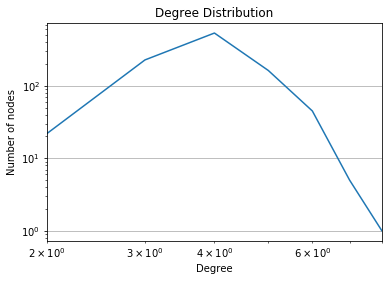

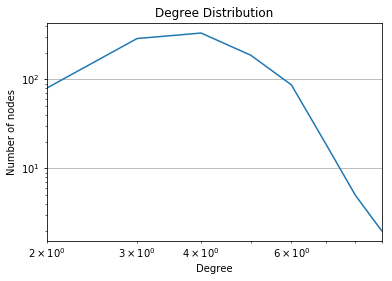

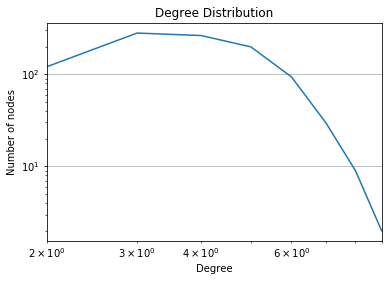

In [21]:
plot_deg_dist(wsrg1)
plot_deg_dist(wsrg2)
plot_deg_dist(wsrg3)

### Calculate the diamater and average shortest path length for these graphs. Also plot the clustering coefficient for the nodes of these graphs. Compare these results with previous results. Based on this comparison, which one of these models is a better choice for describing an online social network in your opinion? Explain your answer.

WSRG1 results:
WSRG1 diameter : 12
WSRG1 avg shortest path length : 6.89436036036


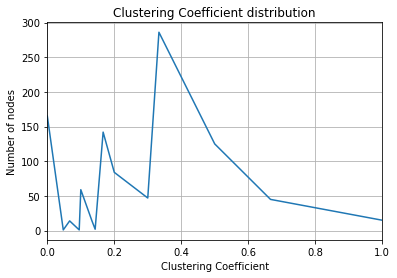

Average Clustering Coefficient= 0.266528571429
WSRG2 results:
WSRG2 diameter : 10
WSRG2 avg shortest path length : 5.59744744745


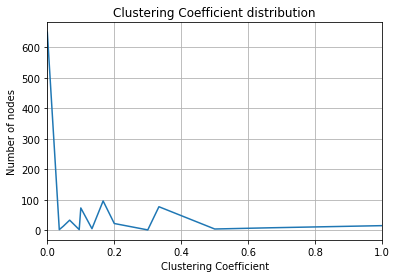

Average Clustering Coefficient= 0.0797476190476
WSRG3 results:
WSRG3 diameter : 9
WSRG3 avg shortest path length : 5.37077877878


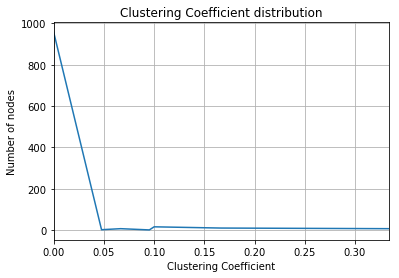

Average Clustering Coefficient= 0.00625714285714


In [36]:
print "WSRG1 results:"
print "WSRG1 diameter : " + str(nx.diameter(wsrg1))
print "WSRG1 avg shortest path length : " + str(nx.average_shortest_path_length(wsrg1))
plot_clustering_coeff(wsrg1)

print "WSRG2 results:"
print "WSRG2 diameter : " + str(nx.diameter(wsrg2))
print "WSRG2 avg shortest path length : " + str(nx.average_shortest_path_length(wsrg2))
plot_clustering_coeff(wsrg2)

print "WSRG3 results:"
print "WSRG3 diameter : " + str(nx.diameter(wsrg3))
print "WSRG3 avg shortest path length : " + str(nx.average_shortest_path_length(wsrg3))
plot_clustering_coeff(wsrg3)

## In the next part of HW we are going to find the best probability distribution that fits the actual degree distributions of three graphs whose adjacency matrices/edge lists are given.

## Task 4

### 1) Run the following code to import the necessary libraries and then read the adjacency list of graph G1 from its file and print the graph information using NetworkX library. Define the variable 'n' as the number of nodes in the graph.

In [17]:
# Importing NetworkX and useful libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import powerlaw
from scipy.stats import norm
from scipy.stats import laplace
from scipy.stats import expon
from scipy.stats import binom
import scipy.integrate as integrate
import powerlaw

In [18]:
# Reading a Barabasi-Albert graph with parameters n and m
fh=open("G1.adjlist", 'rb')
G=nx.read_adjlist(fh)


In [20]:
# Printing the basic information of the graph
print nx.info(G)

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 4975
Average degree:   9.9500


### 2) Plot:    a) The degree distribution of the graph with arithmetic and log-log scales.    b) The normalized degree distribution of the graph.

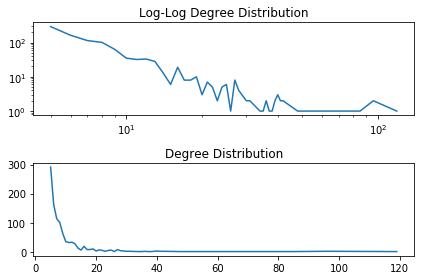

In [32]:
# Plotting the degree distribution

degs = {}
for n in G.nodes():
    deg = G.degree(n) 
    if deg not in degs:
        degs[deg] = 0 
    degs[deg] += 1

items = sorted(degs.items())
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot([k for (k,v) in items], [v for (k,v) in items]) 
ax.set_xscale('log') 
ax.set_yscale('log')
plt.title("Log-Log Degree Distribution")

ab = fig.add_subplot(212)
ab.plot([k for (k,v) in items], [v for (k,v) in items]) 
#ab.set_xscale('log') 
#ab.set_yscale('log')
plt.title("Degree Distribution")
fig.tight_layout()
#fig.savefig("degree_distribution.png")
plt.show()

### 3) Use SciPy stat library to find the parameters of the best Laplace and Normal distributions that fit the degree sequence of the graph. 

In [42]:
# Finding the best fit for degree distribution of the graph
# We are going to postpone the Binomial fitting to 
degree_sequence = [d for n, d in G.degree()]
print "laplace params"
print laplace.fit(degree_sequence,loc=0,scale=1)
print "normal dist params"
print norm.fit(degree_sequence,loc=0,scale=1)

laplace params
(6.9999999930516008, 4.440018744415589)
normal dist params
(9.9499999999999993, 10.197916453864485)


### 4) Use the powerlaw library to find the alpha parameter of the best power_law distribution that fits the degree sequence of G1. Store the minimum value of the degree sequence of G1 in 'xmin' variable and the alpha in 'alpha' variable.

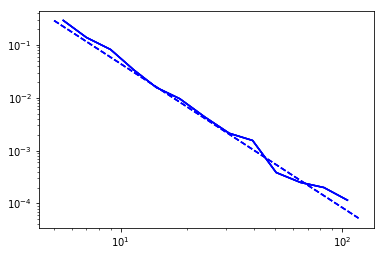

('alpha= ', 2.7162351346826039, '  sigma= ', 0.054272120260028679)


In [51]:
# EXTRA: Install powerlaw library with "pip install powerlow"
#xmin= min(degs.items())
degree_sequence = [d for n, d in G.degree()]
#print degree_sequence

fit=powerlaw.Fit(degree_sequence,discrete=True,xmin=min(degree_sequence))
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf( color= 'b')
plt.show()
print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

### 5) Define a power-law function which accepts an input 'x' and two parameters 'xmin' and 'alpha' as its parameters. Also define two functions called MSE and KL which calculate the mean squared error and the KL divergence between two given on dimentional arrays.

In [73]:
## Defining powerlaw functions
def plaw(x, xmin_param, alpha):
    dist=powerlaw.Power_Law(xmin_param, parameters=[alpha])
    #fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
    #fit.plot_pdf( color= 'b')
    #plt.show()
    #print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)
    simulated_data = dist.generate_random(x)
    return simulated_data

def MSE(A, B):
    return np.square(np.subtract(A, B)).mean()
    
def KL(a, b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)
    return np.sum(np.where(a != 0, a * np.log(a / b), 0))
    
    

### 6) Since the probability distributions we are working with are continuous while the degree distribution is discrete, we need to find an estimated discrete version of these distributions. Use the power-law function defined above and the pdf functions of the distributions mentioned above in SciPy to find a discrete version of the the distributions by calculating the integral from each integer value to the next integer value for the probability mass of the first integer. For example, here we need to integrate for each of the possible values of the degree sequence to the next integer number and store it in an array.

In [72]:
# Estimating a discrete distribution for each of the continuous distributions.

plaw_dist=plaw(1000,5,fit.power_law.alpha)
#simulated_data = vals.generate_random(11)


### 7) In this part you are supposed to calculate the MSE and KL divergence between the actual degree distribution and the estimated discrete distributions and state which probability distributions fits the actual distribution based on these two criterias, i.e., MSE and KL divergence. Also explain which of these two criteria is a better choice in your opinion.

In [75]:
# Comparing the MSE and KL divergence for different distributions
print "MSE: "
print MSE(plaw_dist,degree_sequence)
print "KL: "
print KL(plaw_dist,degree_sequence)


MSE: 
628.221190436
KL: 
1286.32877026


### 8) Plot the actual degree distribution along with the estimated discrete distribution for each of the above-mentioned distributions on an arithmatic and log-log scale figure. Which distributions fits the actual degree distribution better? Explain your answer.

The log-log plot actually depicts a better fit.

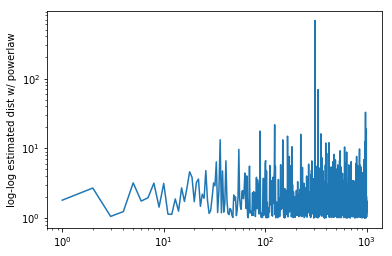

In [82]:
# Plotting the distributions
plt.loglog(plaw_dist)
plt.ylabel('log-log estimated dist w/ powerlaw')
plt.show()

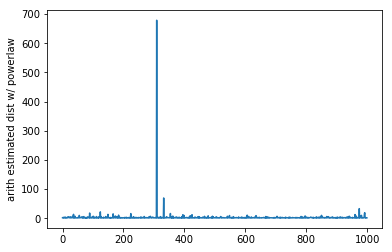

In [84]:
plt.plot(plaw_dist)
plt.ylabel('arith estimated dist w/ powerlaw')
plt.show()

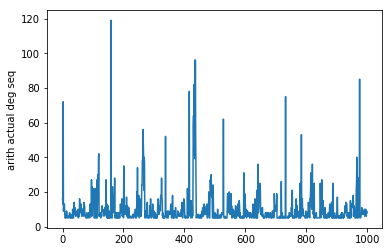

In [86]:
plt.plot(degree_sequence)
plt.ylabel('arith actual deg seq')
plt.show()

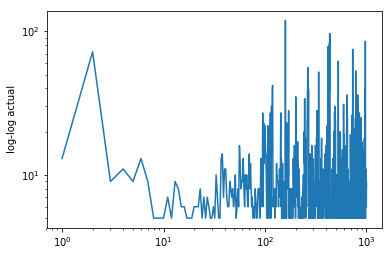

In [83]:
plt.loglog(degree_sequence)
plt.ylabel('log-log actual')
plt.show()

### 9) Repeat the previous part by using SciPy library continious PDFs instead of the estimated discrete distributions.

In [ ]:
# Plotting the distributions


